In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Midterm

In [2]:
df = pd.read_json("Video_Games_5.json", lines=True)

In [3]:
df_sample = df.sample(n=100_000, random_state=42)

In [4]:
print(df_sample.head())

            reviewerID        asin           reviewerName   helpful  \
168500  A17M1HL6U2GS7M  B0047TLIBU             Storylover  [31, 43]   
189019  A1FGU7F9UJ264N  B0053BCP40          Kelly Randall    [0, 0]   
94086   A3R7M2EP1EYNVT  B000WCQWR6  Thomas B. Hileman Jr.    [0, 0]   
168763  A369KP0JV77JYT  B00498T500                    Jon    [4, 4]   
17314     ABIKTKAWOMY8  B00005BIG7          Chance Farley    [3, 3]   

                                               reviewText  overall  \
168500  Been playing this for two days now, and I am v...        5   
189019  I really enjoyed playing this game, although i...        4   
94086   This was kind of a gamble and was looking for ...        3   
168763  ***Updated 7/7/2011 - update marked below***I ...        4   
17314   It looks like we've come a long way from past ...        5   

                                                  summary  unixReviewTime  \
168500  It feels like hanging out with old friends aga...      1299715200  

C:\Users\jackw\AppData\Local\Temp\ipykernel_15124\4187280768.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="overall", data=df, palette="crest")


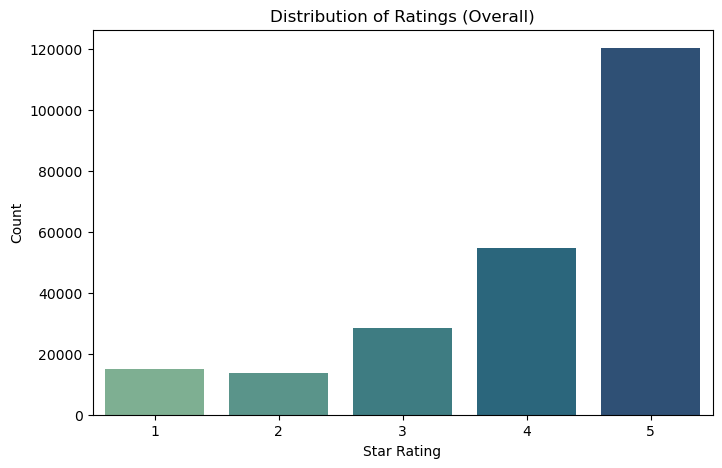

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x="overall", data=df, palette="crest")
plt.title("Distribution of Ratings (Overall)")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.savefig("figures/rate_dist.png",dpi=300)
plt.show()



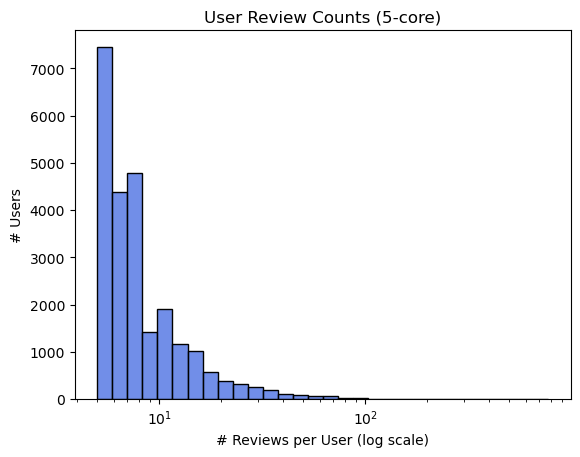

In [6]:
review_counts = df['reviewerID'].value_counts()
sns.histplot(review_counts, bins=30, log_scale=True, color="royalblue")
plt.title("User Review Counts (5-core)")
plt.xlabel("# Reviews per User (log scale)")
plt.ylabel("# Users")
plt.savefig("figures/review_counts.png",dpi=300)
plt.show()

Missing Value Percentage by Column:
 reviewerName      1.21
reviewerID        0.00
asin              0.00
helpful           0.00
reviewText        0.00
overall           0.00
summary           0.00
unixReviewTime    0.00
reviewTime        0.00
dtype: float64


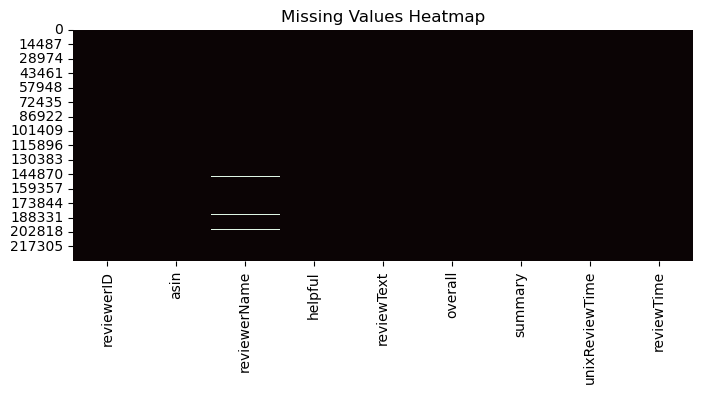

In [5]:
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
print("Missing Value Percentage by Column:\n", missing_pct.round(2))

plt.figure(figsize=(8, 3))
sns.heatmap(df.isna(), cbar=False, cmap="mako")
plt.title("Missing Values Heatmap")
plt.show()

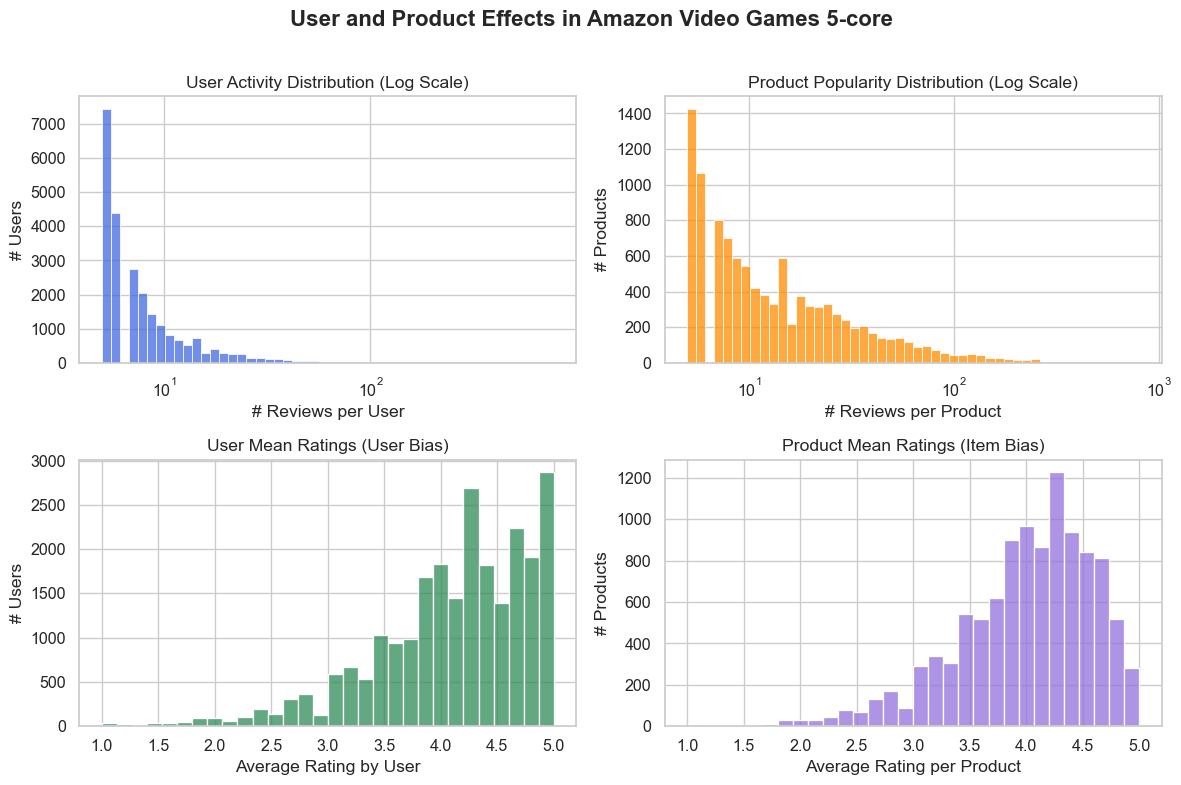

Users: 24,303, Avg reviews/user = 9.54, Median = 7.0
Products: 10,672, Avg reviews/product = 21.72, Median = 11.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", font_scale=1.05)
plt.rcParams["figure.figsize"] = (12, 8)

user_counts = df["reviewerID"].value_counts()
item_counts = df["asin"].value_counts()
user_mean_rating = df.groupby("reviewerID")["overall"].mean()
item_mean_rating = df.groupby("asin")["overall"].mean()
fig, axes = plt.subplots(2, 2)
fig.suptitle("User and Product Effects in Amazon Video Games 5-core", fontsize=16, weight="bold")

# User activity (log-scale)
sns.histplot(user_counts, bins=50, log_scale=True, color="royalblue", ax=axes[0,0])
axes[0,0].set_title("User Activity Distribution (Log Scale)")
axes[0,0].set_xlabel("# Reviews per User")
axes[0,0].set_ylabel("# Users")

# Product popularity (log-scale)
sns.histplot(item_counts, bins=50, log_scale=True, color="darkorange", ax=axes[0,1])
axes[0,1].set_title("Product Popularity Distribution (Log Scale)")
axes[0,1].set_xlabel("# Reviews per Product")
axes[0,1].set_ylabel("# Products")

#User mean rating (user bias)
sns.histplot(user_mean_rating, bins=30, color="seagreen", ax=axes[1,0])
axes[1,0].set_title("User Mean Ratings (User Bias)")
axes[1,0].set_xlabel("Average Rating by User")
axes[1,0].set_ylabel("# Users")

#Product mean rating (item bias)
sns.histplot(item_mean_rating, bins=30, color="mediumpurple", ax=axes[1,1])
axes[1,1].set_title("Product Mean Ratings (Item Bias)")
axes[1,1].set_xlabel("Average Rating per Product")
axes[1,1].set_ylabel("# Products")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("figures/user_product.png",dpi=600)
plt.show()

# --- Optional quick stats for notes ---
print(f"Users: {len(user_counts):,}, Avg reviews/user = {user_counts.mean():.2f}, Median = {user_counts.median()}")
print(f"Products: {len(item_counts):,}, Avg reviews/product = {item_counts.mean():.2f}, Median = {item_counts.median()}")


C:\Users\jackw\AppData\Local\Temp\ipykernel_15124\261836299.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="overall", y="helpful_ratio", data=helpful_by_rating, palette="coolwarm")


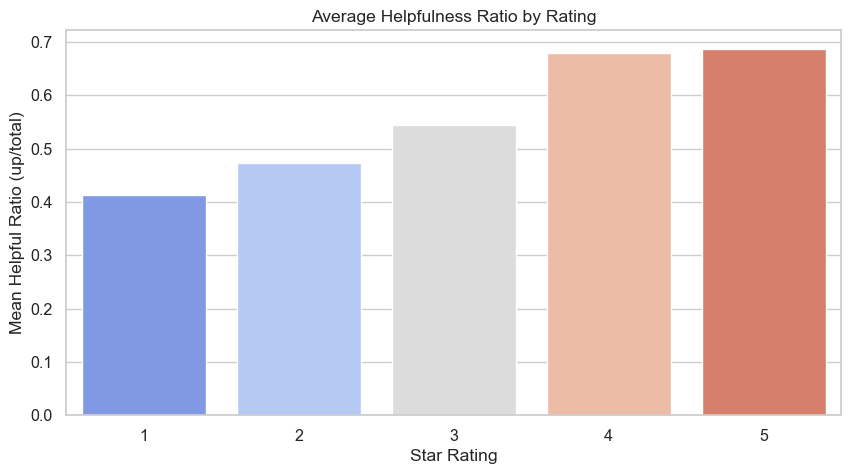

   overall  helpful_ratio
0        1       0.413747
1        2       0.472496
2        3       0.543983
3        4       0.678378
4        5       0.687608


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def helpful_ratio(x):
    try:
        up, total = x
        return up / total if total > 0 else np.nan
    except:
        return np.nan

df["helpful_ratio"] = df["helpful"].apply(helpful_ratio)
df["helpful_total"] = df["helpful"].apply(lambda x: x[1] if isinstance(x, list) else 0)
helpful_by_rating = df.groupby("overall")["helpful_ratio"].mean().reset_index()


sns.barplot(x="overall", y="helpful_ratio", data=helpful_by_rating, palette="coolwarm")
plt.title("Average Helpfulness Ratio by Rating")
plt.xlabel("Star Rating")
plt.ylabel("Mean Helpful Ratio (up/total)")
plt.show()

print(helpful_by_rating)


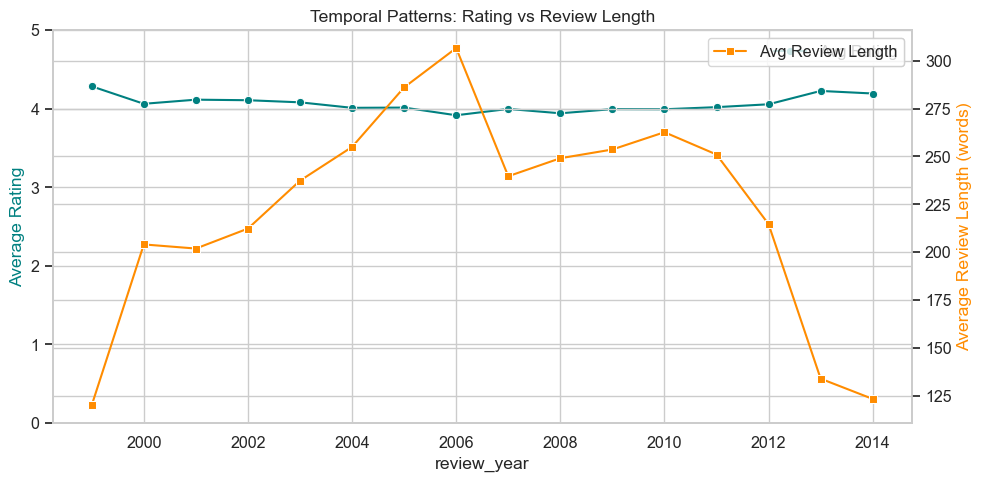

In [13]:
df["review_length"] = df["reviewText"].apply(lambda s: len(str(s).split()))
yearly_behavior = df.groupby("review_year").agg(
    avg_rating=("overall", "mean"),
    avg_length=("review_length", "mean")
).reset_index()

fig, ax1 = plt.subplots()
sns.lineplot(x="review_year", y="avg_rating", data=yearly_behavior,
             marker="o", color="teal", label="Avg Rating", ax=ax1)
ax1.set_ylabel("Average Rating", color="teal")
ax1.set_ylim(0, 5)

ax2 = ax1.twinx()
sns.lineplot(x="review_year", y="avg_length", data=yearly_behavior,
             marker="s", color="darkorange", label="Avg Review Length", ax=ax2)
ax2.set_ylabel("Average Review Length (words)", color="darkorange")

plt.title("Temporal Patterns: Rating vs Review Length")
plt.tight_layout()
plt.show()


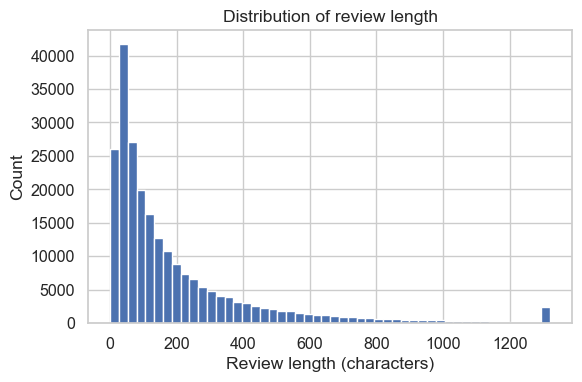

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# If review_length is word count, they can be very skewed.
# 
lengths = df["review_length"].clip(upper=df["review_length"].quantile(0.99))

plt.figure(figsize=(6, 4))
plt.hist(lengths, bins=50)
plt.xlabel("Review length (characters)")
plt.ylabel("Count")
plt.title("Distribution of review length")
plt.tight_layout()
plt.savefig("figures/review_length.png",dpi=300)
plt.show()


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

sns.set(style="whitegrid", font_scale=1.05)
plt.rcParams["figure.figsize"] = (10, 5)

# --- Basic derived text features ---
df["review_length"] = df["reviewText"].apply(lambda s: len(str(s).split()))
df["exclam_ratio"]  = df["reviewText"].apply(lambda s: s.count("!") / len(str(s)) if isinstance(s, str) and len(s) > 0 else 0)
df["question_ratio"]= df["reviewText"].apply(lambda s: s.count("?") / len(str(s)) if isinstance(s, str) and len(s) > 0 else 0)

# --- Sentiment polarity ---
df["sentiment"] = df["reviewText"].apply(lambda s: TextBlob(str(s)).sentiment.polarity if isinstance(s, str) else 0)


C:\Users\jackw\AppData\Local\Temp\ipykernel_15124\188597564.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=sorted(df["overall"].unique()))


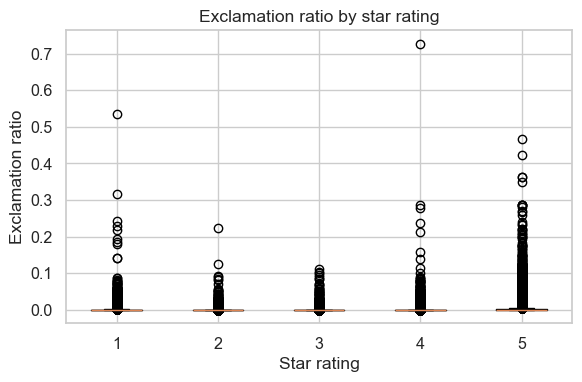

In [16]:
plt.figure(figsize=(6, 4))
data = [df.loc[df["overall"] == k, "exclam_ratio"] for k in sorted(df["overall"].unique())]
plt.boxplot(data, labels=sorted(df["overall"].unique()))
plt.xlabel("Star rating")
plt.ylabel("Exclamation ratio")
plt.title("Exclamation ratio by star rating")
plt.tight_layout()
plt.savefig("figures/ex_ratio.png",dpi=300)
plt.show()


C:\Users\jackw\AppData\Local\Temp\ipykernel_23384\1182620926.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=sorted(df["overall"].unique()))


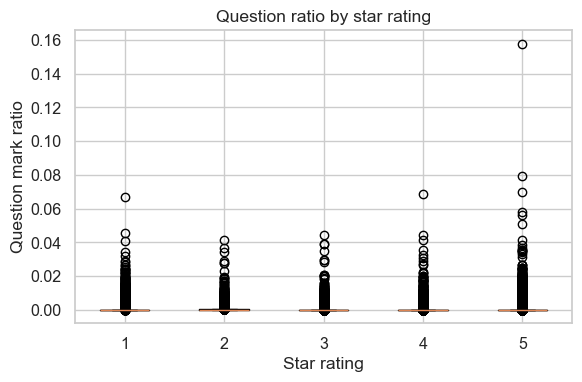

In [17]:
plt.figure(figsize=(6, 4))
data = [df.loc[df["overall"] == k, "question_ratio"] for k in sorted(df["overall"].unique())]
plt.boxplot(data, labels=sorted(df["overall"].unique()))
plt.xlabel("Star rating")
plt.ylabel("Question mark ratio")
plt.title("Question ratio by star rating")
plt.tight_layout()
plt.show()


C:\Users\jackw\AppData\Local\Temp\ipykernel_23384\3273233230.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=sorted(df["overall"].unique()))


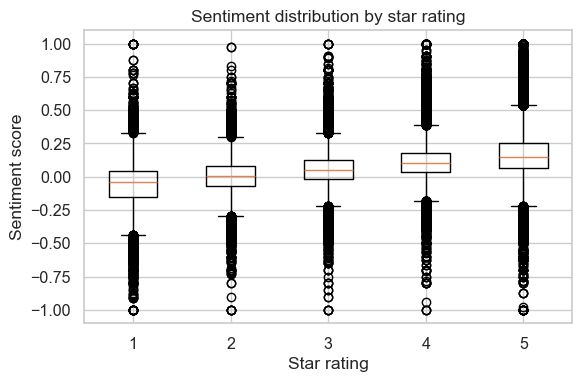

In [ ]:
plt.figure(figsize=(6, 4))
data = [df.loc[df["overall"] == k, "sentiment"] for k in sorted(df["overall"].unique())]
plt.boxplot(data, labels=sorted(df["overall"].unique()))
plt.xlabel("Star rating")
plt.ylabel("Sentiment score")
plt.title("Sentiment distribution by star rating")
plt.tight_layout()
plt.show()


C:\Users\jackw\AppData\Local\Temp\ipykernel_15124\851421490.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="overall", y="review_length", data=df, ax=axes[0], showfliers=False, palette="Blues")
C:\Users\jackw\AppData\Local\Temp\ipykernel_15124\851421490.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="overall", y="sentiment", data=df, ax=axes[1], showfliers=False, palette="coolwarm")


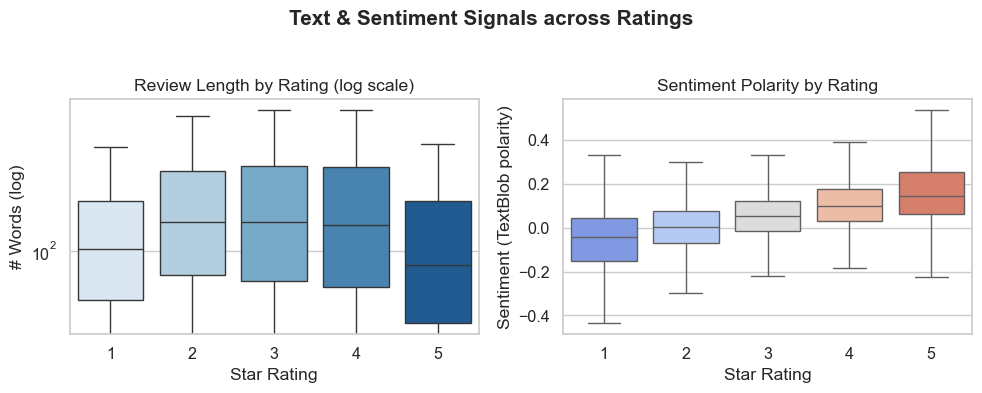

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#Review length vs rating
sns.boxplot(x="overall", y="review_length", data=df, ax=axes[0], showfliers=False, palette="Blues")
axes[0].set_yscale("log")
axes[0].set_title("Review Length by Rating (log scale)")
axes[0].set_xlabel("Star Rating")
axes[0].set_ylabel("# Words (log)")

#Sentiment polarity vs rating
sns.boxplot(x="overall", y="sentiment", data=df, ax=axes[1], showfliers=False, palette="coolwarm")
axes[1].set_title("Sentiment Polarity by Rating")
axes[1].set_xlabel("Star Rating")
axes[1].set_ylabel("Sentiment (TextBlob polarity)")


plt.suptitle("Text & Sentiment Signals across Ratings", fontsize=15, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("figures/sent_rating.png",dpi=400)
plt.show()


C:\Users\jackw\AppData\Local\Temp\ipykernel_23384\1141733150.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(data_len, labels=sorted(df["overall"].unique()))
C:\Users\jackw\AppData\Local\Temp\ipykernel_23384\1141733150.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(data_ex, labels=sorted(df["overall"].unique()))


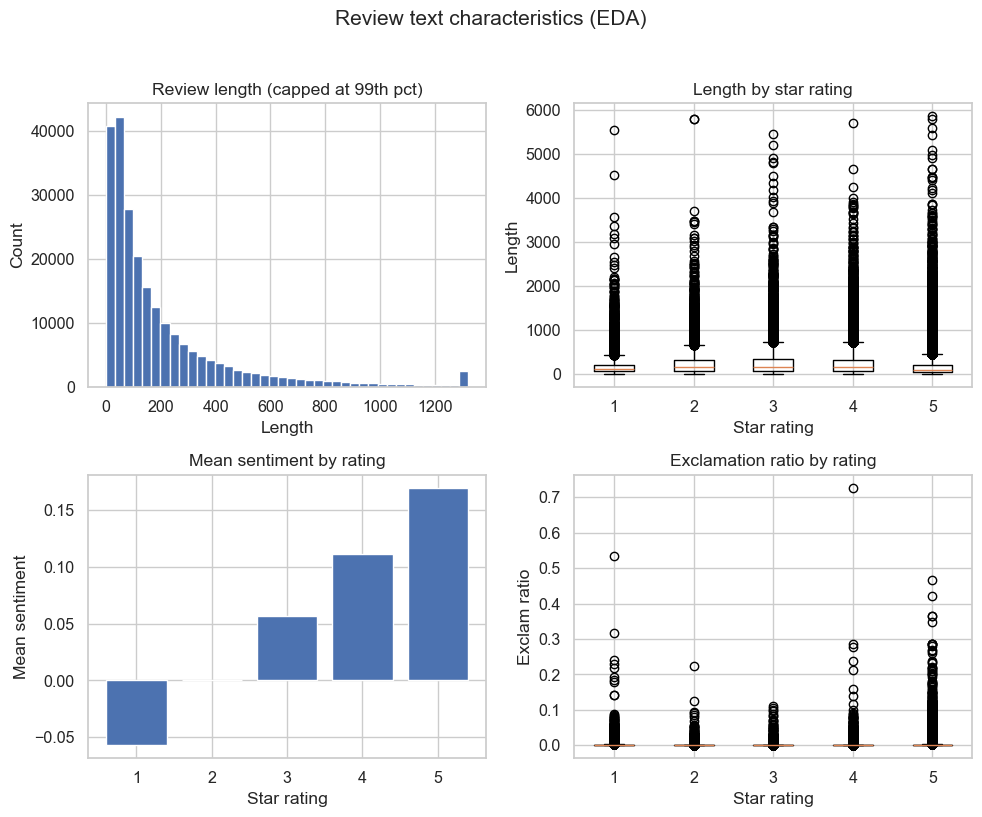

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# (1) Review length histogram
lengths = df["review_length"].clip(upper=df["review_length"].quantile(0.99))
axes[0, 0].hist(lengths, bins=40)
axes[0, 0].set_title("Review length (capped at 99th pct)")
axes[0, 0].set_xlabel("Length")
axes[0, 0].set_ylabel("Count")

# (2) Review length by rating
data_len = [df.loc[df["overall"] == k, "review_length"] for k in sorted(df["overall"].unique())]
axes[0, 1].boxplot(data_len, labels=sorted(df["overall"].unique()))
axes[0, 1].set_title("Length by star rating")
axes[0, 1].set_xlabel("Star rating")
axes[0, 1].set_ylabel("Length")

# (3) Sentiment by rating (mean)
sent_mean = df.groupby("overall")["sentiment"].mean()
axes[1, 0].bar(sent_mean.index.astype(str), sent_mean.values)
axes[1, 0].set_title("Mean sentiment by rating")
axes[1, 0].set_xlabel("Star rating")
axes[1, 0].set_ylabel("Mean sentiment")

# (4) Exclamation ratio by rating
data_ex = [df.loc[df["overall"] == k, "exclam_ratio"] for k in sorted(df["overall"].unique())]
axes[1, 1].boxplot(data_ex, labels=sorted(df["overall"].unique()))
axes[1, 1].set_title("Exclamation ratio by rating")
axes[1, 1].set_xlabel("Star rating")
axes[1, 1].set_ylabel("Exclam ratio")

fig.suptitle("Review text characteristics (EDA)", y=1.02)
plt.tight_layout()
plt.show()


# Final cont

In [19]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import GroupShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer

# ------------------------------------------------------------------
# 0. Basic setup and label (MULTI-CLASS)
# ------------------------------------------------------------------
df = df.copy()

# Multi-class target: 1–5 stars -> 0–4 encoded
df["overall_enc"] = df["overall"].astype(int) - 1
print("Encoded label classes:", sorted(df["overall_enc"].unique()))

# make sure text has no NaNs (TF-IDF will choke on NaNs)
text_col = "reviewText"
df[text_col] = df[text_col].fillna("")

# ------------------------------------------------------------------
# 1. Helpful stats & time-derived features
# ------------------------------------------------------------------
def helpful_ratio(x):
    try:
        up, tot = x
        return up / tot if tot > 0 else np.nan
    except Exception:
        return np.nan

df["helpful_total"] = df["helpful"].apply(
    lambda x: x[1] if isinstance(x, list) else np.nan
)
df["helpful_ratio"] = df["helpful"].apply(helpful_ratio)

ts = pd.to_datetime(df["unixReviewTime"], unit="s")
df["year"]  = ts.dt.year
df["month"] = ts.dt.month
df["dow"]   = ts.dt.dayofweek

# ------------------------------------------------------------------
# 2. User-aware splits (no leakage across users)
# ------------------------------------------------------------------
gss = GroupShuffleSplit(n_splits=1, test_size=0.40, random_state=42)
train_idx, test_idx = next(gss.split(df, groups=df["reviewerID"]))
train_df, test_df = df.iloc[train_idx].copy(), df.iloc[test_idx].copy()

gss2 = GroupShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
val_idx, final_idx = next(gss2.split(test_df, groups=test_df["reviewerID"]))
val_df, final_df = test_df.iloc[val_idx].copy(), test_df.iloc[final_idx].copy()

# ------------------------------------------------------------------
# 3. Numeric columns & dropping those with missing values
# ------------------------------------------------------------------
base_numeric_cols = [
    "review_length", "exclam_ratio", "question_ratio", "sentiment",
    "helpful_ratio", "helpful_total", "year", "month", "dow"
]

# Check missingness ONLY on train to decide what to drop
train_num = train_df[base_numeric_cols]
col_missing_any = train_num.isna().any()   # True if any NaN in that column
numeric_cols = [c for c in base_numeric_cols if not col_missing_any[c]]
dropped_cols = [c for c in base_numeric_cols if c not in numeric_cols]

print("[Train] Dropping numeric cols with any missing values:", dropped_cols)

# ------------------------------------------------------------------
# 4. Build X / y using MULTI-CLASS target overall_enc
# ------------------------------------------------------------------
X_train = train_df[[text_col] + numeric_cols]
y_train = train_df["overall_enc"].astype(int)

X_val   = val_df[[text_col] + numeric_cols]
y_val   = val_df["overall_enc"].astype(int)

X_test  = final_df[[text_col] + numeric_cols]
y_test  = final_df["overall_enc"].astype(int)

# Optional: sanity check missing status after dropping
row_missing_frac = X_train[numeric_cols].isna().any(axis=1).mean()
col_missing_pct  = X_train[numeric_cols].isna().mean().sort_values(ascending=False) * 100

# ------------------------------------------------------------------
# 5. Numeric pipeline
# ------------------------------------------------------------------
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # essentially no-op if no NaNs
    ("scaler", StandardScaler())
])

# ------------------------------------------------------------------
# 6. Text pipeline with stricter / more efficient TF-IDF
# ------------------------------------------------------------------
text_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        lowercase=True,
        strip_accents="unicode",
        stop_words="english",
        token_pattern=r"(?u)\b[a-zA-Z]{2,}\b",
        ngram_range=(1, 2),
        min_df=10,
        max_df=0.5,
        max_features=15000,
        sublinear_tf=True
    ))
])

# ------------------------------------------------------------------
# 7. ColumnTransformer to combine numeric + text
# ------------------------------------------------------------------
preproc = ColumnTransformer(
    transformers=[
        ("num",  numeric_pipe, numeric_cols),
        ("text", text_pipe, text_col),
    ],
    sparse_threshold=0.3
)

# Fit on train, transform all
X_train_proc = preproc.fit_transform(X_train)
X_val_proc   = preproc.transform(X_val)
X_test_proc  = preproc.transform(X_test)

print(f"Train rows: {X_train.shape[0]:,} | Val rows: {X_val.shape[0]:,} | Test rows: {X_test.shape[0]:,}")
print(f"Numeric features used: {len(numeric_cols)} (dropped: {dropped_cols})")
print(f"Features AFTER (TF-IDF + numeric): {X_train_proc.shape[1]:,}")
print("y_train classes:", sorted(np.unique(y_train)))


Encoded label classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
[Train] Dropping numeric cols with any missing values: ['helpful_ratio']
Train rows: 140,329 | Val rows: 45,753 | Test rows: 45,698
Numeric features used: 8 (dropped: ['helpful_ratio'])
Features AFTER (TF-IDF + numeric): 15,008
y_train classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


Logistic/Linear RF, **SVM, XGBoost

## CV

In [20]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ---------------------------
#  Shared data prep
# ---------------------------
text_col = "reviewText"

# Train subset: only rows with year >= 2014
min_year = 2014
train_df_sub = train_df[train_df["year"] >= min_year].copy()

X_train = train_df_sub[[text_col] + numeric_cols]
y_train = train_df_sub["overall_enc"].astype(int)
groups  = train_df_sub["reviewerID"]

X_val  = val_df[[text_col] + numeric_cols]
y_val  = val_df["overall_enc"].astype(int)

X_test = final_df[[text_col] + numeric_cols]
y_test = final_df["overall_enc"].astype(int)

num_classes = y_train.nunique()
print(f"Train subset size (year >= {min_year}): {len(train_df_sub):,}")
print("Classes in y_train:", sorted(y_train.unique()))

# Group-aware CV
gkf = GroupKFold(n_splits=3)


Train subset size (year >= 2014): 16,377
Classes in y_train: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [22]:
# ---------------------------
#  Model 1: Baseline LogReg
# ---------------------------
logreg_base = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    penalty="l2",
    C=1.0,          # baseline regularization
    max_iter=3000,
    n_jobs=-1,
    random_state=42,
)

pipe_logreg_base = Pipeline([
    ("preproc", preproc),
    ("clf", logreg_base),
])

cv_scores_1 = cross_val_score(
    pipe_logreg_base,
    X_train,
    y_train,
    cv=gkf,
    groups=groups,
    scoring="accuracy",
    n_jobs=-1,
)

print("\n=== Model 1: Logistic Regression (baseline, C=1.0) ===")
print(f"CV accuracy (mean ± std): {cv_scores_1.mean():.4f} ± {cv_scores_1.std():.4f}")

pipe_logreg_base.fit(X_train, y_train)

y_val_pred_1 = pipe_logreg_base.predict(X_val)
val_acc_1 = accuracy_score(y_val, y_val_pred_1)
print(f"Validation accuracy: {val_acc_1:.4f}")
print("Validation classification report:")
print(classification_report(y_val, y_val_pred_1))

y_test_pred_1 = pipe_logreg_base.predict(X_test)
test_acc_1 = accuracy_score(y_test, y_test_pred_1)
print(f"Test accuracy: {test_acc_1:.4f}")
print("Test classification report:")
print(classification_report(y_test, y_test_pred_1))

# ---------------------------
#  Model 2: LogReg (tuned C)
# ---------------------------
logreg_tuned = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    penalty="l2",
    max_iter=3000,
    n_jobs=-1,
    random_state=42,
)

pipe_logreg_tuned = Pipeline([
    ("preproc", preproc),
    ("clf", logreg_tuned),
])

param_grid_logreg = {
    "clf__C": [0.1, 0.2, 0.5, 1.0, 2.0],
}

gs_logreg = GridSearchCV(
    estimator=pipe_logreg_tuned,
    param_grid=param_grid_logreg,
    cv=gkf,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

print("\n=== Model 2: Logistic Regression (tuned C) ===")
gs_logreg.fit(X_train, y_train, groups=groups)

print("Best params:", gs_logreg.best_params_)
print(f"Best CV accuracy: {gs_logreg.best_score_: .4f}")

best_logreg = gs_logreg.best_estimator_

y_val_pred_2 = best_logreg.predict(X_val)
val_acc_2 = accuracy_score(y_val, y_val_pred_2)
print(f"Validation accuracy (best_logreg): {val_acc_2:.4f}")
print("Validation classification report:")
print(classification_report(y_val, y_val_pred_2))

y_test_pred_2 = best_logreg.predict(X_test)
test_acc_2 = accuracy_score(y_test, y_test_pred_2)
print(f"Test accuracy (best_logreg): {test_acc_2:.4f}")
print("Test classification report:")
print(classification_report(y_test, y_test_pred_2))

# ---------------------------
#  Model 3: Random Forest (tuned)
# ---------------------------
rf_clf = RandomForestClassifier(
    n_jobs=-1,
    random_state=42,
)

pipe_rf = Pipeline([
    ("preproc", preproc),
    ("clf", rf_clf),
])

param_grid_rf = {
    "clf__n_estimators": [200, 300],
    "clf__max_depth": [None, 20],
    "clf__min_samples_leaf": [1, 2, 5],
}

gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=gkf,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

print("\n=== Model 3: Random Forest (tuned) ===")
gs_rf.fit(X_train, y_train, groups=groups)

print("Best params:", gs_rf.best_params_)
print(f"Best CV accuracy: {gs_rf.best_score_: .4f}")

best_rf = gs_rf.best_estimator_

y_val_pred_3 = best_rf.predict(X_val)
val_acc_3 = accuracy_score(y_val, y_val_pred_3)
print(f"Validation accuracy (best_rf): {val_acc_3:.4f}")
print("Validation classification report:")
print(classification_report(y_val, y_val_pred_3))

y_test_pred_3 = best_rf.predict(X_test)
test_acc_3 = accuracy_score(y_test, y_test_pred_3)
print(f"Test accuracy (best_rf): {test_acc_3:.4f}")
print("Test classification report:")
print(classification_report(y_test, y_test_pred_3))
# ---------------------------
#  Model 4: XGBoost (light tuning)
# ---------------------------
num_classes = len(np.unique(y_train))

xgb_clf = XGBClassifier(
    objective="multi:softmax",
    num_class=num_classes,    # 5 classes: 0–4
    tree_method="hist",
    eval_metric="mlogloss",
    n_jobs=1,                 # IMPORTANT: let GridSearchCV handle parallelism
    random_state=42,
)

pipe_xgb = Pipeline([
    ("preproc", preproc),
    ("clf", xgb_clf),
])

param_grid_xgb = {
    "clf__n_estimators": [80],
    "clf__max_depth": [4],
    "clf__learning_rate": [0.05],
    "clf__subsample": [0.8, 1.0],
    "clf__colsample_bytree": [0.8, 1.0],
}

gs_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=gkf,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

print("\n=== Model 4: XGBoost (tuned, small grid) ===")
gs_xgb.fit(X_train, y_train, groups=groups)

print("Best params:", gs_xgb.best_params_)
print(f"Best CV accuracy: {gs_xgb.best_score_: .4f}")

best_xgb = gs_xgb.best_estimator_

y_val_pred_4 = best_xgb.predict(X_val)
val_acc_4 = accuracy_score(y_val, y_val_pred_4)
print(f"Validation accuracy (best_xgb): {val_acc_4:.4f}")
print("Validation classification report:")
print(classification_report(y_val, y_val_pred_4))

y_test_pred_4 = best_xgb.predict(X_test)
test_acc_4 = accuracy_score(y_test, y_test_pred_4)
print(f"Test accuracy (best_xgb): {test_acc_4:.4f}")
print("Test classification report:")
print(classification_report(y_test, y_test_pred_4))

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# ---------------------------
#  Model 5: LinearSVC (tuned C)
# ---------------------------
svm_clf = LinearSVC(
    # one-vs-rest multi-class by default
    random_state=42,
)

pipe_svm = Pipeline([
    ("preproc", preproc),
    ("clf", svm_clf),
])

# Small grid over C (regularization strength)
param_grid_svm = {
    "clf__C": [0.1, 0.5, 1.0, 2.0],
}

gs_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=param_grid_svm,
    cv=gkf,                # GroupKFold(3)
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

print("\n=== Model 5: LinearSVC (tuned C) ===")
gs_svm.fit(X_train, y_train, groups=groups)

print("Best params:", gs_svm.best_params_)
print(f"Best CV accuracy: {gs_svm.best_score_:.4f}")

best_svm = gs_svm.best_estimator_

# Validation performance
y_val_pred_svm = best_svm.predict(X_val)
val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
print(f"Validation accuracy (best_svm): {val_acc_svm:.4f}")
print("Validation classification report:")
print(classification_report(y_val, y_val_pred_svm))

# Test performance
y_test_pred_svm = best_svm.predict(X_test)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Test accuracy (best_svm): {test_acc_svm:.4f}")
print("Test classification report:")
print(classification_report(y_test, y_test_pred_svm))






=== Model 1: Logistic Regression (baseline, C=1.0) ===
CV accuracy (mean ± std): 0.6327 ± 0.0024


c:\ProgramData\anaconda3\envs\data1030\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation accuracy: 0.5847
Validation classification report:
              precision    recall  f1-score   support

           0       0.56      0.36      0.44      2791
           1       0.21      0.10      0.13      2627
           2       0.40      0.20      0.26      5657
           3       0.44      0.24      0.31     10947
           4       0.64      0.92      0.75     23731

    accuracy                           0.58     45753
   macro avg       0.45      0.36      0.38     45753
weighted avg       0.53      0.58      0.53     45753

Test accuracy: 0.5850
Test classification report:
              precision    recall  f1-score   support

           0       0.61      0.37      0.46      3156
           1       0.23      0.11      0.15      2742
           2       0.41      0.21      0.27      5543
           3       0.44      0.24      0.31     10870
           4       0.64      0.92      0.75     23387

    accuracy                           0.58     45698
   macro avg       

c:\ProgramData\anaconda3\envs\data1030\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best params: {'clf__C': 2.0}
Best CV accuracy:  0.6329
Validation accuracy (best_logreg): 0.5868
Validation classification report:
              precision    recall  f1-score   support

           0       0.57      0.38      0.46      2791
           1       0.23      0.12      0.16      2627
           2       0.39      0.22      0.28      5657
           3       0.43      0.27      0.33     10947
           4       0.66      0.90      0.76     23731

    accuracy                           0.59     45753
   macro avg       0.45      0.38      0.40     45753
weighted avg       0.54      0.59      0.54     45753

Test accuracy (best_logreg): 0.5893
Test classification report:
              precision    recall  f1-score   support

           0       0.62      0.40      0.48      3156
           1       0.26      0.14      0.18      2742
           2       0.40      0.23      0.30      5543
           3       0.44      0.27      0.33     10870
           4       0.65      0.90      0.76  

In [23]:
# ==========================================
#  Step 7: Uncertainty due to splitting (CV)
# ==========================================

def cv_summary(estimator, X, y, groups, cv, name, scoring="accuracy"):
    scores = cross_val_score(
        estimator,
        X, y,
        cv=cv,
        groups=groups,
        scoring=scoring,
        n_jobs=-1,
    )
    print(f"[{name}] CV {scoring}: {scores.mean():.4f} ± {scores.std():.4f}")
    return scores


In [24]:
from sklearn.base import clone
def cv_with_seeds(pipe, model_name, X, y, groups, cv, scoring="accuracy", seeds=(0, 1, 2)):
    """
    For a given Pipeline `pipe`, if its classifier has a `random_state`
    parameter, run cross-validated evaluation for each of the given seeds,
    and return the mean metric per seed.
    """
    seed_means = []

    for seed in seeds:
        # Clone the whole pipeline so we start from unfitted state
        pipe_seed = clone(pipe)

        # Access the classifier step
        clf = pipe_seed.named_steps["clf"]

        # If it has random_state, set it for this run
        if hasattr(clf, "random_state"):
            clf.set_params(random_state=seed)

        scores = cross_val_score(
            pipe_seed,
            X, y,
            cv=cv,
            groups=groups,
            scoring=scoring,
            n_jobs=-1,
        )
        mean_score = scores.mean()
        seed_means.append(mean_score)
        print(f"{model_name}, seed={seed}: {scoring} = {mean_score:.4f}")

    seed_means = np.array(seed_means)
    print(f"{model_name} across seeds: {seed_means.mean():.4f} ± {seed_means.std():.4f}")
    return seed_means


In [25]:
#Split-related uncertainty (per fold)
cv_logreg_tuned = cv_summary(best_logreg, X_train, y_train, groups, gkf, name="LogReg_tuned")
cv_svm          = cv_summary(best_svm,    X_train, y_train, groups, gkf, name="LinearSVC")
cv_rf           = cv_summary(best_rf,     X_train, y_train, groups, gkf, name="RandomForest")
cv_xgb          = cv_summary(best_xgb,    X_train, y_train, groups, gkf, name="XGBoost")

[LogReg_tuned] CV accuracy: 0.6329 ± 0.0018
[LinearSVC] CV accuracy: 0.6306 ± 0.0043
[RandomForest] CV accuracy: 0.5977 ± 0.0051
[XGBoost] CV accuracy: 0.6123 ± 0.0040


In [26]:
#Seed-related uncertainty (only for models with random_state)
rf_seed_means  = cv_with_seeds(best_rf,  "RandomForest", X_train, y_train, groups, gkf)
xgb_seed_means = cv_with_seeds(best_xgb, "XGBoost",      X_train, y_train, groups, gkf)
logreg_seed_means = cv_with_seeds(best_logreg, "LogReg_tuned", X_train, y_train, groups, gkf)
svm_seed_means    = cv_with_seeds(best_svm,    "LinearSVC",    X_train, y_train, groups, gkf)

RandomForest, seed=0: accuracy = 0.5989
RandomForest, seed=1: accuracy = 0.5983
RandomForest, seed=2: accuracy = 0.5985
RandomForest across seeds: 0.5986 ± 0.0003
XGBoost, seed=0: accuracy = 0.6123
XGBoost, seed=1: accuracy = 0.6129
XGBoost, seed=2: accuracy = 0.6133
XGBoost across seeds: 0.6128 ± 0.0004
LogReg_tuned, seed=0: accuracy = 0.6329
LogReg_tuned, seed=1: accuracy = 0.6328
LogReg_tuned, seed=2: accuracy = 0.6329
LogReg_tuned across seeds: 0.6329 ± 0.0000
LinearSVC, seed=0: accuracy = 0.6306
LinearSVC, seed=1: accuracy = 0.6306
LinearSVC, seed=2: accuracy = 0.6306
LinearSVC across seeds: 0.6306 ± 0.0000


In [29]:
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error

def eval_metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    macro_f1 = f1_score(y_true, y_pred, average="macro")
    weighted_f1 = f1_score(y_true, y_pred, average="weighted")
    mae = mean_absolute_error(y_true, y_pred)
    within1 = np.mean(np.abs(y_true - y_pred) <= 1)

    print(f"\n[{name}]")
    print(f"  Accuracy     : {acc:.4f}")
    print(f"  Macro F1     : {macro_f1:.4f}")
    print(f"  Weighted F1  : {weighted_f1:.4f}")
    print(f"  MAE (stars)  : {mae:.4f}")
    print(f"  Within-1 acc : {within1:.4f}")

    return {
        "accuracy": acc,
        "macro_f1": macro_f1,
        "weighted_f1": weighted_f1,
        "mae": mae,
        "within1": within1,
    }

# Validation metrics
m_val_logreg = eval_metrics("LogReg_tuned (val)", y_val, y_val_pred_2)
m_val_svm    = eval_metrics("LinearSVC (val)",   y_val, y_val_pred_svm)
m_val_rf     = eval_metrics("RandomForest (val)", y_val, y_val_pred_3)
m_val_xgb    = eval_metrics("XGBoost (val)",     y_val, y_val_pred_4)

# Test metrics
m_test_logreg = eval_metrics("LogReg_tuned (test)", y_test, y_test_pred_2)
m_test_svm    = eval_metrics("LinearSVC (test)",    y_test, y_test_pred_svm)
m_test_rf     = eval_metrics("RandomForest (test)", y_test, y_test_pred_3)
m_test_xgb    = eval_metrics("XGBoost (test)",      y_test, y_test_pred_4)



[LogReg_tuned (val)]
  Accuracy     : 0.5868
  Macro F1     : 0.3973
  Weighted F1  : 0.5439
  MAE (stars)  : 0.6243
  Within-1 acc : 0.8644

[LinearSVC (val)]
  Accuracy     : 0.5838
  Macro F1     : 0.3591
  Weighted F1  : 0.5163
  MAE (stars)  : 0.6604
  Within-1 acc : 0.8462

[RandomForest (val)]
  Accuracy     : 0.5352
  Macro F1     : 0.2099
  Weighted F1  : 0.3970
  MAE (stars)  : 0.8413
  Within-1 acc : 0.7780

[XGBoost (val)]
  Accuracy     : 0.5626
  Macro F1     : 0.3101
  Weighted F1  : 0.4641
  MAE (stars)  : 0.7372
  Within-1 acc : 0.8145

[LogReg_tuned (test)]
  Accuracy     : 0.5893
  Macro F1     : 0.4105
  Weighted F1  : 0.5472
  MAE (stars)  : 0.6246
  Within-1 acc : 0.8648

[LinearSVC (test)]
  Accuracy     : 0.5837
  Macro F1     : 0.3668
  Weighted F1  : 0.5172
  MAE (stars)  : 0.6673
  Within-1 acc : 0.8464

[RandomForest (test)]
  Accuracy     : 0.5297
  Macro F1     : 0.2083
  Weighted F1  : 0.3903
  MAE (stars)  : 0.8682
  Within-1 acc : 0.7720

[XGBoost (tes

In [30]:
import os, joblib
os.makedirs("results", exist_ok=True)

# Save best models
joblib.dump(best_logreg, "results/model_logreg_tuned.pkl")
joblib.dump(best_svm,   "results/model_linear_svc.pkl")
joblib.dump(best_rf,    "results/model_random_forest.pkl")
joblib.dump(best_xgb,   "results/model_xgboost.pkl")

# Save predictions
val_preds_df = pd.DataFrame({
    "y_val_true":   y_val,
    "logreg_tuned": y_val_pred_2,
    "linear_svc":   y_val_pred_svm,
    "rf_tuned":     y_val_pred_3,
    "xgb_tuned":    y_val_pred_4,
})
val_preds_df.to_csv("results/val_predictions.csv", index=False)

test_preds_df = pd.DataFrame({
    "y_test_true":  y_test,
    "logreg_tuned": y_test_pred_2,
    "linear_svc":   y_test_pred_svm,
    "rf_tuned":     y_test_pred_3,
    "xgb_tuned":    y_test_pred_4,
})
test_preds_df.to_csv("results/test_predictions.csv", index=False)


## RESULTS

In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error

os.makedirs("results", exist_ok=True)

# ---------- 1. Helper to compute metrics ----------

def eval_metrics(y_true, y_pred):
    acc        = accuracy_score(y_true, y_pred)
    macro_f1   = f1_score(y_true, y_pred, average="macro")
    weighted_f1= f1_score(y_true, y_pred, average="weighted")
    mae        = mean_absolute_error(y_true, y_pred)
    within1    = np.mean(np.abs(y_true - y_pred) <= 1)
    return acc, macro_f1, weighted_f1, mae, within1

# ---------- 2. Majority-class baseline ----------

# majority label from TRAIN
majority_label = y_train.value_counts().idxmax()
y_test_majority = np.full_like(y_test, fill_value=majority_label)

(
    acc_base,
    macro_f1_base,
    weighted_f1_base,
    mae_base,
    within1_base,
) = eval_metrics(y_test, y_test_majority)

# (Optional) also evaluate baseline on val if you want
y_val_majority = np.full_like(y_val, fill_value=majority_label)
(
    acc_base_val,
    macro_f1_base_val,
    weighted_f1_base_val,
    mae_base_val,
    within1_base_val,
) = eval_metrics(y_val, y_val_majority)

# ---------- 3. Metrics for best models on TEST ----------

# Logistic regression (baseline C=1.0)
acc_logreg0, macro_f1_logreg0, weighted_f1_logreg0, mae_logreg0, within1_logreg0 = \
    eval_metrics(y_test, y_test_pred_1)

# Logistic regression tuned
acc_logreg, macro_f1_logreg, weighted_f1_logreg, mae_logreg, within1_logreg = \
    eval_metrics(y_test, y_test_pred_2)

# LinearSVC
acc_svm, macro_f1_svm, weighted_f1_svm, mae_svm, within1_svm = \
    eval_metrics(y_test, y_test_pred_svm)

# Random Forest
acc_rf, macro_f1_rf, weighted_f1_rf, mae_rf, within1_rf = \
    eval_metrics(y_test, y_test_pred_3)

# XGBoost
acc_xgb, macro_f1_xgb, weighted_f1_xgb, mae_xgb, within1_xgb = \
    eval_metrics(y_test, y_test_pred_4)

# ---------- 4. Build performance table ----------

rows = [
    {
        "model": "Majority baseline",
        "type": "baseline",
        "cv_mean_acc": np.nan,
        "cv_std_acc":  np.nan,
        "seed_std_acc": np.nan,
        "test_acc": acc_base,
        "test_macro_f1": macro_f1_base,
        "test_weighted_f1": weighted_f1_base,
        "test_mae": mae_base,
        "test_within1": within1_base,
    },
    {
        "model": "LogReg_baseline",
        "type": "linear",
        "cv_mean_acc": cv_scores_1.mean(),
        "cv_std_acc":  cv_scores_1.std(),
        "seed_std_acc": np.std(logreg_seed_means) if "logreg_seed_means" in globals() else np.nan,
        "test_acc": acc_logreg0,
        "test_macro_f1": macro_f1_logreg0,
        "test_weighted_f1": weighted_f1_logreg0,
        "test_mae": mae_logreg0,
        "test_within1": within1_logreg0,
    },
    {
        "model": "LogReg_tuned",
        "type": "linear",
        "cv_mean_acc": cv_logreg_tuned.mean(),
        "cv_std_acc":  cv_logreg_tuned.std(),
        "seed_std_acc": np.std(logreg_seed_means),
        "test_acc": acc_logreg,
        "test_macro_f1": macro_f1_logreg,
        "test_weighted_f1": weighted_f1_logreg,
        "test_mae": mae_logreg,
        "test_within1": within1_logreg,
    },
    {
        "model": "LinearSVC",
        "type": "linear",
        "cv_mean_acc": cv_svm.mean(),
        "cv_std_acc":  cv_svm.std(),
        "seed_std_acc": np.std(svm_seed_means),
        "test_acc": acc_svm,
        "test_macro_f1": macro_f1_svm,
        "test_weighted_f1": weighted_f1_svm,
        "test_mae": mae_svm,
        "test_within1": within1_svm,
    },
    {
        "model": "RandomForest",
        "type": "non-linear",
        "cv_mean_acc": cv_rf.mean(),
        "cv_std_acc":  cv_rf.std(),
        "seed_std_acc": np.std(rf_seed_means),
        "test_acc": acc_rf,
        "test_macro_f1": macro_f1_rf,
        "test_weighted_f1": weighted_f1_rf,
        "test_mae": mae_rf,
        "test_within1": within1_rf,
    },
    {
        "model": "XGBoost",
        "type": "non-linear",
        "cv_mean_acc": cv_xgb.mean(),
        "cv_std_acc":  cv_xgb.std(),
        "seed_std_acc": np.std(xgb_seed_means),
        "test_acc": acc_xgb,
        "test_macro_f1": macro_f1_xgb,
        "test_weighted_f1": weighted_f1_xgb,
        "test_mae": mae_xgb,
        "test_within1": within1_xgb,
    },
]

perf_df = pd.DataFrame(rows)
perf_df.to_csv("results/model_performance.csv", index=False)
print(perf_df)


               model        type  cv_mean_acc  cv_std_acc  seed_std_acc  \
0  Majority baseline    baseline          NaN         NaN           NaN   
1    LogReg_baseline      linear     0.632717    0.002351      0.000029   
2       LogReg_tuned      linear     0.632900    0.001813      0.000029   
3          LinearSVC      linear     0.630641    0.004325      0.000000   
4       RandomForest  non-linear     0.597667    0.005149      0.000251   
5            XGBoost  non-linear     0.612322    0.003964      0.000430   

   test_acc  test_macro_f1  test_weighted_f1  test_mae  test_within1  
0  0.511773       0.135410          0.346496  0.936715      0.749639  
1  0.584993       0.390212          0.533644  0.649328      0.854808  
2  0.589347       0.410546          0.547197  0.624601      0.864786  
3  0.583745       0.366753          0.517239  0.667272      0.846361  
4  0.529739       0.208252          0.390277  0.868156      0.772003  
5  0.560287       0.312723          0.463105  0.

In [38]:
import matplotlib.pyplot as plt

# assume perf_df already exists
n_rows = len(perf_df)

# shorter figure: height scales with number of rows
fig_height = 0.5 + 0.35 * n_rows   # tune these numbers if you like
fig, ax = plt.subplots(figsize=(9, fig_height))

ax.axis("off")

tbl = ax.table(
    cellText=perf_df.round(4).values,
    colLabels=perf_df.columns,
    loc="center"
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(8)
tbl.auto_set_column_width(col=list(range(len(perf_df.columns))))

# tighten the table inside the axes
# left, bottom, right, top in figure coordinates
tbl.scale(1.0, 1.1)  # slightly increase row height; adjust as needed
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02)

# save with minimal padding
plt.savefig(
    "figures/model_performance.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.02
)
plt.close(fig)



In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.makedirs("results", exist_ok=True)

# ---- collect std across folds and across seeds ----
model_names = ["LogReg_tuned", "LinearSVC", "RandomForest", "XGBoost"]

split_stds = np.array([
    cv_logreg_tuned.std(),
    cv_svm.std(),
    cv_rf.std(),
    cv_xgb.std(),
])

seed_stds = np.array([
    np.std(logreg_seed_means),
    np.std(svm_seed_means),
    np.std(rf_seed_means),
    np.std(xgb_seed_means),
])

# ---- grouped bar plot ----
x = np.arange(len(model_names))
width = 0.35

fig_height = 3.0
fig, ax = plt.subplots(figsize=(6, fig_height))

ax.bar(x - width/2, split_stds,  width, label="Across folds")
ax.bar(x + width/2, seed_stds,   width, label="Across seeds")

ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=20, ha="right")
ax.set_ylabel("Std of CV accuracy")
ax.set_title("Uncertainty from data splits vs. random seeds")
ax.legend()

plt.tight_layout()
plt.savefig("figures/uncertainty_std.png", dpi=300, bbox_inches="tight", pad_inches=0.02)
plt.close(fig)


In [87]:
results = [
    {
        "Model": "LogReg_baseline",
        "Type": "Logistic Regression",
        "Key params": "C=1.0, L2, saga",
        "CV_mean":  cv_scores_1.mean(),
        "Val_acc":  val_acc_1,
        "Test_acc": test_acc_1,
    },
    {
        "Model": "LogReg_tunedC",
        "Type": "Logistic Regression",
        "Key params": f"C={gs_logreg.best_params_['clf__C']}",
        "CV_mean":  gs_logreg.best_score_,
        "Val_acc":  val_acc_2,
        "Test_acc": test_acc_2,
    },
    {
        "Model": "RandomForest",
        "Type": "Random Forest",
        "Key params": str(gs_rf.best_params_),
        "CV_mean":  gs_rf.best_score_,
        "Val_acc":  val_acc_3,
        "Test_acc": test_acc_3,
    },
    {
        "Model": "XGBoost",
        "Type": "Gradient Boosted Trees",
        "Key params": str(gs_xgb.best_params_),
        "CV_mean":  gs_xgb.best_score_,
        "Val_acc":  val_acc_4,
        "Test_acc": test_acc_4,
    },
    {
        "Model": "LinearSVC",
        "Type": "Linear SVM",
        "Key params": str(gs_svm.best_params_),
        "CV_mean":  gs_svm.best_score_,
        "Val_acc":  val_acc_svm,
        "Test_acc": test_acc_svm,
    },
]

results_df = pd.DataFrame(results)
print("\n=== Summary table of models ===")
print(results_df)



=== Summary table of models ===
             Model                    Type  \
0  LogReg_baseline     Logistic Regression   
1    LogReg_tunedC     Logistic Regression   
2     RandomForest           Random Forest   
3          XGBoost  Gradient Boosted Trees   
4        LinearSVC              Linear SVM   

                                          Key params   CV_mean   Val_acc  \
0                                    C=1.0, L2, saga  0.632717  0.584530   
1                                              C=2.0  0.634304  0.586125   
2  {'clf__max_depth': None, 'clf__min_samples_lea...  0.597667  0.538260   
3  {'clf__colsample_bytree': 1.0, 'clf__learning_...  0.612322  0.562520   
4                                    {'clf__C': 0.1}  0.630641  0.585186   

   Test_acc  
0  0.584117  
1  0.587378  
2  0.533327  
3  0.560703  
4  0.584555  


In [89]:
results_df_enriched = results_df.merge(metrics_df, on="Model", how="left")

# Round for readability
for col in [
    "CV_mean", "Val_acc", "Test_acc",
    "Test_macroF1", "Test_weightedF1",
    "Test_MAE_stars", "Test_within1",
]:
    results_df_enriched[col] = results_df_enriched[col].round(3)

display_df = (
    results_df_enriched
    .copy()
    .sort_values("Test_acc", ascending=False)
)

cols_to_color = [
    "CV_mean", "Val_acc", "Test_acc",
    "Test_macroF1", "Test_weightedF1", "Test_within1"
]

styled = (
    display_df
    .style
    .set_caption("Model comparison (accuracy, F1, ordinal metrics)")
    .background_gradient(subset=cols_to_color, cmap="Blues")
    .hide(axis="index")
)

styled


Model,Type,Key params,CV_mean,Val_acc,Test_acc,Test_acc_recomputed,Test_macroF1,Test_weightedF1,Test_MAE_stars,Test_within1
LogReg_tunedC,Logistic Regression,C=2.0,0.634000,0.586000,0.587000,0.587378,0.404000,0.543000,0.633000,0.862000
LinearSVC,Linear SVM,{'clf__C': 0.1},0.631000,0.585000,0.585000,0.584555,0.370000,0.519000,0.664000,0.848000
LogReg_baseline,Logistic Regression,"C=1.0, L2, saga",0.633000,0.585000,0.584000,0.584117,0.392000,0.534000,0.648000,0.856000
XGBoost,Gradient Boosted Trees,"{'clf__colsample_bytree': 1.0, 'clf__learning_rate': 0.05, 'clf__max_depth': 4, 'clf__n_estimators': 80, 'clf__subsample': 0.8}",0.612000,0.563000,0.561000,0.560703,0.313000,0.464000,0.749000,0.812000
RandomForest,Random Forest,"{'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 200}",0.598000,0.538000,0.533000,0.533327,0.218000,0.399000,0.857000,0.776000


In [54]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score

# y_train, y_test are overall_enc
class_counts = Counter(y_train)
print("Train class counts:", class_counts)

# Majority-class baseline
majority_class = class_counts.most_common(1)[0][0]
print("Majority class (encoded):", majority_class)

y_test_majority = np.full_like(y_test, fill_value=majority_class)
baseline_acc = accuracy_score(y_test, y_test_majority)
print("Majority baseline accuracy (test):", baseline_acc)

# Optional: random baseline (uniform over 5 classes)
rng = np.random.RandomState(0)
y_test_random = rng.randint(0, 5, size=len(y_test))
random_acc = accuracy_score(y_test, y_test_random)
print("Random guess accuracy (approx, uniform):", random_acc)


Train class counts: Counter({4: 9599, 3: 3291, 2: 1739, 0: 964, 1: 784})
Majority class (encoded): 4
Majority baseline accuracy (test): 0.5117729441113397
Random guess accuracy (approx, uniform): 0.20081841656089983


In [40]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

models_for_plot = {
    "LogReg_baseline": pipe_logreg_base,
    "LogReg_tunedC":   best_logreg,
    "RandomForest":    best_rf,
    "XGBoost":         best_xgb,
    "LinearSVC":       best_svm,
}

cv_means = []
cv_stds  = []
names    = []

for name, pipe in models_for_plot.items():
    scores = cross_val_score(
        pipe,
        X_train,
        y_train,
        cv=gkf,
        groups=groups,
        scoring="accuracy",
        n_jobs=-1,
    )
    names.append(name)
    cv_means.append(scores.mean())
    cv_stds.append(scores.std())
    print(f"{name}: CV mean={scores.mean():.3f}, std={scores.std():.3f}")

plt.figure(figsize=(7, 4))
plt.errorbar(names, cv_means, yerr=cv_stds, fmt="o", capsize=5)
plt.xticks(rotation=20)
plt.ylabel("CV accuracy")
plt.title("Cross-validated accuracy (mean ± std)")
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

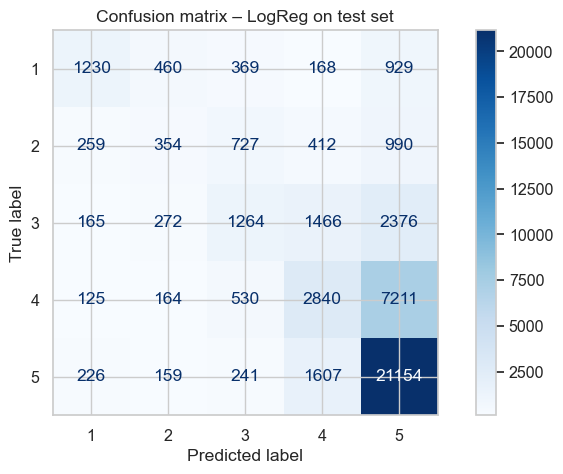

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred_svm = best_logreg.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred_svm, labels=[0,1,2,3,4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3,4,5])
disp.plot(cmap="Blues")
plt.title("Confusion matrix - LogReg on test set")
plt.show()


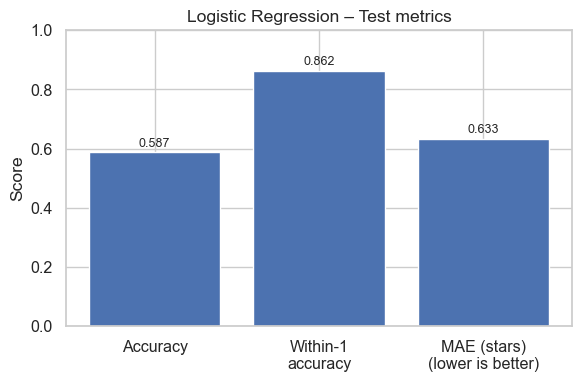

In [60]:
import matplotlib.pyplot as plt

metrics = {
    "Accuracy": acc,
    "Within-1\naccuracy": within1,
    "MAE (stars)\n(lower is better)": mae,
}

plt.figure(figsize=(6,4))
bars = plt.bar(list(metrics.keys()), list(metrics.values()))
plt.ylim(0, 1)  # metrics are all in [0,1]-ish range
plt.ylabel("Score")
plt.title("Logistic Regression – Test metrics")

# optional: annotate values on top of bars
for bar, value in zip(bars, metrics.values()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f"{value:.3f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


In [42]:
import numpy as np

logreg_clf = best_logreg.named_steps["clf"]
ct         = best_logreg.named_steps["preproc"]

# numeric feature names
num_features = numeric_cols

# text feature names from TF-IDF
text_vect     = ct.named_transformers_["text"].named_steps["tfidf"]
text_features = text_vect.get_feature_names_out()

# ColumnTransformer concatenates [num block, text block]
all_features = np.array(list(num_features) + list(text_features))

coef = logreg_clf.coef_   # shape: (5 classes, n_features) for 0–4 stars
print("coef shape:", coef.shape)


coef shape: (5, 12530)


In [43]:
def top_features_for_class(class_idx, top_k=15):
    coefs = coef[class_idx]
    idx_sorted = np.argsort(coefs)[::-1]  # largest → smallest
    return list(zip(all_features[idx_sorted[:top_k]], coefs[idx_sorted[:top_k]]))

def bottom_features_for_class(class_idx, top_k=15):
    coefs = coef[class_idx]
    idx_sorted = np.argsort(coefs)        # most negative first
    return list(zip(all_features[idx_sorted[:top_k]], coefs[idx_sorted[:top_k]]))

print("\nTop features for 5-star class (class_idx=4):")
for name, w in top_features_for_class(4, top_k=15):
    print(f"{name:20s} {w:.3f}")

print("\nTop features for 1-star class (class_idx=0):")
for name, w in top_features_for_class(0, top_k=15):
    print(f"{name:20s} {w:.3f}")



Top features for 5-star class (class_idx=4):
love                 3.762
loves                3.690
great                3.499
amazing              3.202
awesome              2.908
fantastic            2.753
highly               2.486
perfect              2.380
best                 2.093
favorite             1.962
thank                1.959
perfectly            1.944
say                  1.902
simple               1.885
zelda                1.878

Top features for 1-star class (class_idx=0):
money                3.389
paid                 2.247
returned             2.084
wasted               2.080
worst                2.042
tried                2.033
waste                2.021
garbage              1.946
refund               1.934
work                 1.933
minutes              1.883
crap                 1.819
sucks                1.757
don buy              1.702
amazon               1.668


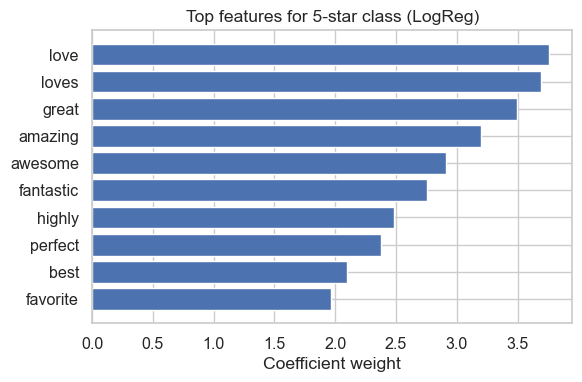

In [44]:
import matplotlib.pyplot as plt

top5 = top_features_for_class(4, top_k=10)  # 5-star
feat_names = [f for f, w in top5]
weights    = [w for f, w in top5]

plt.figure(figsize=(6,4))
plt.barh(feat_names[::-1], weights[::-1])  # reverse so biggest at top
plt.xlabel("Coefficient weight")
plt.title("Top features for 5-star class (LogReg)")
plt.tight_layout()
plt.show()


coef shape: (5, 12530)


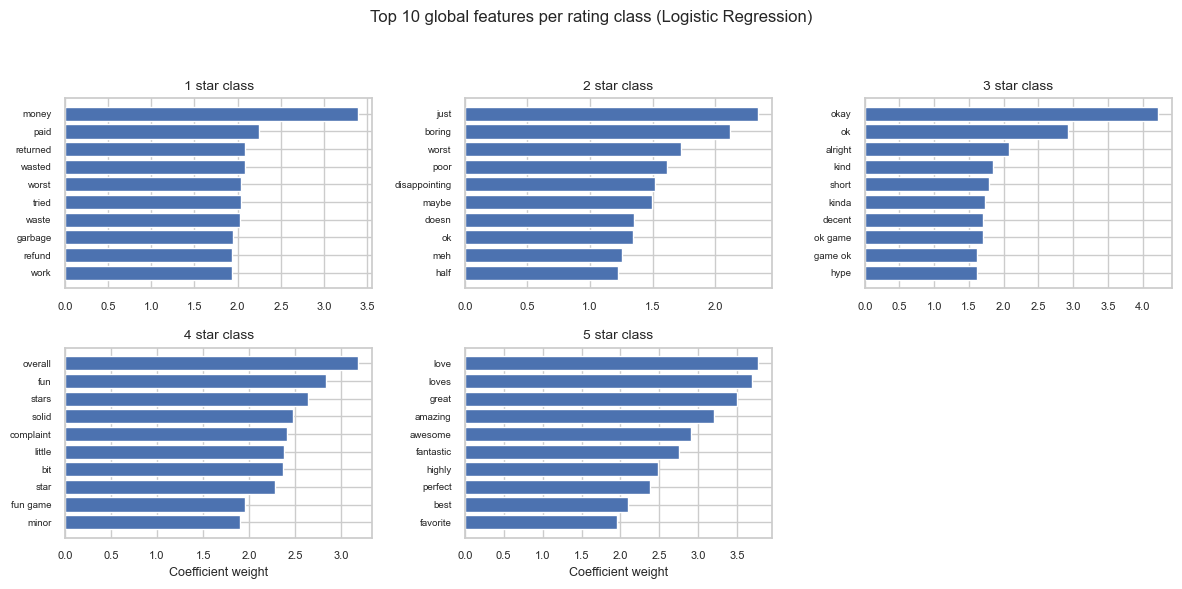

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Extract classifier and feature names ---
logreg_clf = best_logreg.named_steps["clf"]
ct         = best_logreg.named_steps["preproc"]

# Numeric features
num_features = numeric_cols

# Text features from TF-IDF
text_vect     = ct.named_transformers_["text"].named_steps["tfidf"]
text_features = text_vect.get_feature_names_out()
all_features = np.array(list(num_features) + list(text_features))

coef = logreg_clf.coef_   # shape: (5 classes, n_features)
n_classes, n_features = coef.shape
print("coef shape:", coef.shape)  # should be (5, n_features)

# --- 2. Helper to get top-k positive features for a class ---
def get_top_features_for_class(class_idx, top_k=10):
    coefs = coef[class_idx]
    # indices of top_k largest coefficients
    idx_sorted = np.argsort(coefs)[-top_k:]
    # sort within this subset so smallest->largest for nicer barh
    idx_sorted = idx_sorted[np.argsort(coefs[idx_sorted])]
    feat_names   = all_features[idx_sorted]
    feat_weights = coefs[idx_sorted]
    return feat_names, feat_weights

# --- 3. Plot all 5 classes in a compact 2x3 grid ---
top_k = 10
star_labels = [1, 2, 3, 4, 5]  # original star ratings

n_rows, n_cols = 2, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6), sharex=False)
axes = axes.ravel()

for class_idx in range(n_classes):
    ax = axes[class_idx]
    feat_names, feat_weights = get_top_features_for_class(class_idx, top_k=top_k)

    ax.barh(feat_names, feat_weights)
    ax.set_title(f"{star_labels[class_idx]} star class", fontsize=10)
    ax.tick_params(axis="y", labelsize=7)
    ax.tick_params(axis="x", labelsize=8)

    if class_idx // n_cols == n_rows - 1:  # bottom row
        ax.set_xlabel("Coefficient weight", fontsize=9)

# Hide the unused 6th subplot
axes[-1].axis("off")

fig.suptitle(f"Top {top_k} global features per rating class (Logistic Regression)", fontsize=12, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.savefig("figures/global_importance.png", dpi = 300)
plt.show()


In [47]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    best_logreg,
    X_val,
    y_val,
    n_repeats=10,
    random_state=42,
    scoring="accuracy",
    n_jobs=-1,
)

perm_df = pd.DataFrame({
    "feature": X_val.columns,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std,
}).sort_values("importance_mean", ascending=False)

# Save full table
perm_df.to_csv("results/permutation_importance_logreg.csv", index=False)
print(perm_df.head(10))

# Plot top-k features (reviewText + most important numeric features)
top_k = 10
top = perm_df.head(top_k)

fig_height = 0.5 + 0.4 * len(top)
fig, ax = plt.subplots(figsize=(7, fig_height))
ax.barh(top["feature"][::-1], top["importance_mean"][::-1])
ax.set_xlabel("Permutation importance")
ax.set_title("Permutation importance (tuned logistic regression, validation set)")

plt.tight_layout()
plt.savefig("figures/global_importance_permutation.png",
            dpi=300, bbox_inches="tight", pad_inches=0.02)
plt.close(fig)

          feature  importance_mean  importance_std
0      reviewText         0.141180        0.001943
4       sentiment         0.013520        0.000799
5   helpful_total         0.008118        0.000431
2    exclam_ratio         0.002030        0.000292
8             dow         0.000452        0.000348
3  question_ratio         0.000442        0.000168
1   review_length         0.000376        0.000438
6            year         0.000000        0.000000
7           month        -0.000203        0.000520


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# best_xgb is your tuned pipeline: Pipeline(preproc -> XGBClassifier)
pipe_xgb = best_xgb
preproc = pipe_xgb.named_steps["preproc"]
xgb_clf = pipe_xgb.named_steps["clf"]

# Get feature names from the ColumnTransformer; fall back if not supported
try:
    feature_names = preproc.get_feature_names_out()
except AttributeError:
    # Fallback: manually combine numeric + TF-IDF feature names
    num_features = numeric_cols  # already defined in your earlier code
    tfidf = preproc.named_transformers_["text"].named_steps["tfidf"]
    text_features = tfidf.get_feature_names_out()
    feature_names = np.concatenate([np.array(num_features), text_features])

importances = xgb_clf.feature_importances_

xgb_imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances,
}).sort_values("importance", ascending=False)

# Save full table
xgb_imp_df.to_csv("results/xgb_feature_importance.csv", index=False)
print(xgb_imp_df.head(20))

# Plot top-k features
top_k = 20
top = xgb_imp_df.head(top_k)

fig_height = 0.5 + 0.3 * len(top)
fig, ax = plt.subplots(figsize=(7, fig_height))
ax.barh(top["feature"][::-1], top["importance"][::-1])
ax.set_xlabel("XGBoost feature importance")
ax.set_title("Global feature importance (tuned XGBoost)")

plt.tight_layout()
plt.savefig("figures/global_importance_xgb.png",
            dpi=300, bbox_inches="tight", pad_inches=0.02)
plt.close(fig)


                      feature  importance
3              num__sentiment    0.008392
8031            text__overall    0.008129
7013              text__loves    0.005275
4          num__helpful_total    0.004670
6980               text__love    0.004144
7888               text__okay    0.003963
1           num__exclam_ratio    0.003802
5526             text__highly    0.003675
5528   text__highly recommend    0.003636
9506         text__repetitive    0.003531
340            text__annoying    0.003516
2233             text__decent    0.003420
4873               text__good    0.003383
974              text__boring    0.003269
7458              text__money    0.003260
857                 text__bit    0.003235
5692               text__hype    0.003138
8796      text__pretty decent    0.003134
10556             text__stars    0.003084
3484              text__feels    0.003080


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
#LOCAL Importance
os.makedirs("results", exist_ok=True)


pipe_logreg = best_logreg                      
preproc = pipe_logreg.named_steps["preproc"]
clf = pipe_logreg.named_steps["clf"]

# Small background sample from training set for SHAP (for speed)
X_train_sample = X_train.sample(
    n=min(200, len(X_train)),
    random_state=42
)
X_train_sample_proc = preproc.transform(X_train_sample)

# Transform validation set
X_val_proc = preproc.transform(X_val)

# Get feature names
try:
    feature_names = preproc.get_feature_names_out()
except AttributeError:
    num_features = numeric_cols
    tfidf = preproc.named_transformers_["text"].named_steps["tfidf"]
    text_features = tfidf.get_feature_names_out()
    feature_names = np.concatenate([np.array(num_features), text_features])



explainer = shap.LinearExplainer(
    clf,
    X_train_sample_proc,
)


idx = 510   

true_class = int(y_val.iloc[idx])
pred_class = int(pipe_logreg.predict(X_val.iloc[[idx]])[0])

print(f"Explaining validation example idx={idx}, true={true_class}, predicted={pred_class}")

# Compute SHAP values
shap_values = explainer.shap_values(X_val_proc[idx])

# For multi-class logreg, shap_values is a list (one array per class)
if isinstance(shap_values, list):
    sv = shap_values[pred_class]
else:
    sv = shap_values

# sv can be 2-D or sparse; convert to dense 1-D
if hasattr(sv, "toarray"):
    sv = sv.toarray()

shap_for_pred = np.array(sv).ravel()   # (n_features,)

print("SHAP length:", shap_for_pred.shape[0])
print("feature_names length:", len(feature_names))

# -------- handle length mismatch robustly --------
n_feat_shap = shap_for_pred.shape[0]
n_feat_names = len(feature_names)

if n_feat_shap != n_feat_names:
    print(f"WARNING: length mismatch (SHAP={n_feat_shap}, names={n_feat_names}), trimming to min.")
n = min(n_feat_shap, n_feat_names)

shap_for_pred = shap_for_pred[:n]
feature_names_used = feature_names[:n]



shap_df = pd.DataFrame({
    "feature": feature_names_used,
    "shap": shap_for_pred,
})
shap_df["abs_shap"] = shap_df["shap"].abs()

# Take top 15 by |SHAP|
top_k = 15
top = shap_df.sort_values("abs_shap", ascending=False).head(top_k)
top = top.sort_values("shap")  # so largest positive at top of plot

fig_height = 0.5 + 0.35 * len(top)
fig, ax = plt.subplots(figsize=(7, fig_height))

colors = ["tab:red" if v < 0 else "tab:blue" for v in top["shap"]]
ax.barh(top["feature"], top["shap"], color=colors)

ax.set_xlabel("SHAP value (log-odds contribution)")
ax.set_title(
    f"Local SHAP explanation (LogReg tuned, example idx={idx}, "
    f"true={true_class}, pred={pred_class})"
)

plt.tight_layout()
plt.savefig(
    "figures/local_shap_example_logreg.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.02,
)
plt.close(fig)

Explaining validation example idx=510, true=3, predicted=3
SHAP length: 62650
feature_names length: 12530
